# Questions

In [ ]:

Q1. Explain the basic concept of clustering and give examples of applications where clustering is useful.

Q2. What is DBSCAN and how does it differ from other clustering algorithms such as k-means and
hierarchical clustering?

Q3. How do you determine the optimal values for the epsilon and minimum points parameters in DBSCAN
clustering?

Q4. How does DBSCAN clustering handle outliers in a dataset?

Q5. How does DBSCAN clustering differ from k-means clustering?

Q6. Can DBSCAN clustering be applied to datasets with high dimensional feature spaces? If so, what are
some potential challenges?

Q7. How does DBSCAN clustering handle clusters with varying densities?

Q8. What are some common evaluation metrics used to assess the quality of DBSCAN clustering results?

Q9. Can DBSCAN clustering be used for semi-supervised learning tasks?

Q10. How does DBSCAN clustering handle datasets with noise or missing values?

Q11. Implement the DBSCAN algorithm using a python programming language, and apply it to a sample
dataset. Discuss the clustering results and interpret the meaning of the obtained clusters.


## Solutions

In [ ]:
#Sol1...

Clustering is an unsupervised machine learning technique that groups similar data points together based on certain characteristics. 
It aims to identify patterns or structures in data without predefined labels. Each group, or cluster, contains data points that are more similar 
to each other than to those in other clusters.

### Examples of applications:
- **Customer Segmentation:** Grouping customers based on purchasing behavior or demographics for targeted marketing.
- **Image Segmentation:** Dividing an image into regions for object detection.
- **Anomaly Detection:** Identifying unusual patterns in network traffic for cybersecurity.
- **Document Clustering:** Organizing large sets of documents or articles by topic or theme.


In [ ]:
#Sol2...

DBSCAN (Density-Based Spatial Clustering of Applications with Noise) is a density-based clustering algorithm that groups data points based on the
density of surrounding points. It forms clusters of high-density regions separated by low-density regions and can identify outliers (noise).

#Key Differences from K-Means and Hierarchical Clustering:
1.No need for specifying the number of clusters: DBSCAN automatically determines the number of clusters, unlike k-means which requires a predefined
       number of clusters.

2.Handles noise and outliers: DBSCAN can identify and handle noise, while k-means and hierarchical clustering generally assign all points to clusters.

3.Non-spherical clusters: DBSCAN can form arbitrarily shaped clusters, whereas k-means assumes spherical clusters and hierarchical clustering may 
struggle with complex shapes.


In [ ]:
#Sol3...

To determine optimal values for **epsilon (ε)** and **minPts** in DBSCAN:

- **Epsilon (ε)**: Use a **k-distance plot** (distances to the k-nearest neighbors, usually k = minPts) and look for the **elbow point** (sharp bend),
    which suggests a good value for ε.
  
- **minPts**: Set it to at least the number of dimensions + 1 (e.g., for 2D, minPts ≥ 3). Increase it for larger datasets or to form denser clusters.

Experimentation is often needed to find the best combination of ε and minPts based on the dataset's structure.


In [ ]:
#Sol4...

DBSCAN handles outliers by classifying points that do not belong to any cluster as **noise**. These points are not dense enough to meet the 
required minimum number of neighbors (minPts) within the specified distance (ε) from any cluster.

As a result, DBSCAN effectively separates outliers from the dense regions (clusters) in the data.


In [ ]:
#Sol5...

#DBSCAN differs from k-means in several ways:

1. **Number of Clusters**: DBSCAN does not require specifying the number of clusters, whereas k-means requires a predefined number.

2. **Cluster Shape**: DBSCAN can identify arbitrarily shaped clusters, while k-means assumes clusters are spherical.

3. **Outliers**: DBSCAN handles outliers as noise, while k-means assigns all points to clusters, including outliers.

4. **Cluster Size**: DBSCAN can handle clusters of varying densities, while k-means assumes clusters are similar in size.

In [ ]:
#Sol6...

Yes, DBSCAN can be applied to high-dimensional datasets, but there are challenges:

1. **Curse of Dimensionality**: In high dimensions, data points tend to be sparse, making it harder to define a meaningful **epsilon (ε)** for
    density-based clustering.
2. **Distance Measures**: Common distance metrics (like Euclidean) become less meaningful as dimensions increase, potentially affecting cluster quality.
3. **Computational Complexity**: High dimensions increase the computational cost of calculating distances, making DBSCAN slower on large,
    high-dimensional datasets.

Dimensionality reduction techniques like PCA can help mitigate these challenges.
        

In [ ]:
#Sol7...

DBSCAN struggles with clusters of **varying densities** because it uses a single value for **epsilon (ε)** and **minPts** across the entire dataset. 
This means:

- **Tighter clusters** might be treated as noise if the ε is set for sparser clusters.
- **Looser clusters** may get merged or split inappropriately if ε is set for denser clusters.

DBSCAN works best with clusters of similar density, and varying densities may require tuning or alternative approaches like HDBSCAN 
(Hierarchical DBSCAN).

In [ ]:
#Sol8...

#Common evaluation metrics for assessing DBSCAN clustering results include:

1. **Silhouette Score**: Measures how similar each point is to its own cluster versus other clusters (range: -1 to 1, with higher values indicating
                         better-defined clusters).
2. **Davies-Bouldin Index**: Evaluates the average similarity ratio of each cluster with the most similar cluster (lower values are better).
                         
3. **Adjusted Rand Index (ARI)**: Compares the clustering results with ground truth labels (if available) to measure the similarity.
                         
4. **V-Measure**: Assesses the balance between homogeneity (clusters contain only similar points) and completeness (all similar points are in the
                  same cluster).

For DBSCAN, it is also important to consider the number of **noise points** (outliers).


In [ ]:
#Sol9...

Yes, DBSCAN can be used in **semi-supervised learning** by leveraging its ability to identify clusters and outliers. Here's how:

- **Clustering for Labeling**: DBSCAN can group unlabeled data, and these clusters can be used to assign pseudo-labels. Labeled data from the clusters
   can then be used to train a supervised model.
       
- **Outlier Detection**: DBSCAN can identify outliers (noise), which can help in refining labeled datasets by excluding noisy points.

However, it’s mainly used for **unsupervised** tasks, and its role in semi-supervised learning is usually combined with other supervised methods.
                    

In [ ]:
#Sol10...

#DBSCAN handles noise and missing values as follows:

### Noise:
- **Identification**: DBSCAN classifies points that do not belong to any cluster as **noise**. These points are those that are too far from any 
    dense region defined by the parameters ε and minPts.
- **Robustness**: The algorithm's ability to ignore noise helps in maintaining the integrity of cluster formation, focusing on the dense areas of data.

### Missing Values:
- **Impact**: DBSCAN does not inherently handle missing values. If the dataset contains missing values, it can lead to incorrect distance calculations.
- **Preprocessing Required**: To effectively use DBSCAN, missing values should be addressed through techniques like imputation or removal before 
    applying the algorithm.

In summary, while DBSCAN effectively deals with noise, careful preprocessing is essential for handling missing values.
                                                                                         

In [1]:
#Sol11...

import numpy as np
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt


In [ ]:

# Create a sample dataset 
X, y = make_moons(n_samples=300, noise=0.1, random_state=42)


In [25]:
# Apply DBSCAN clustering
dbscan = DBSCAN(eps=0.2, min_samples=5)  # Set parameters
clusters = dbscan.fit_predict(X)  # Perform clustering

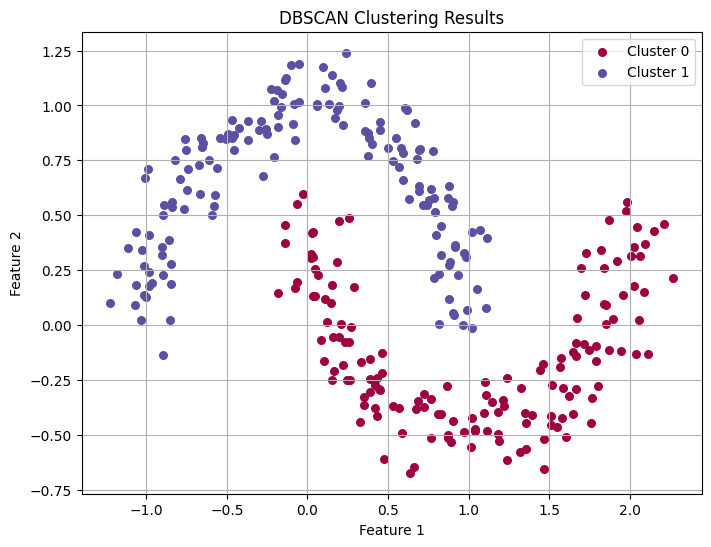

In [26]:
# Create a color map for visualization
unique_labels = set(clusters)  # Get unique cluster labels
colors = plt.cm.Spectral(np.linspace(0, 1, len(unique_labels)))  # Generate colors

# Set up the plot
plt.figure(figsize=(8, 6))  # Set figure size

# Loop through each unique label and plot clusters
for k, col in zip(unique_labels, colors):
    if k == -1:  # If the label is -1, it indicates noise
        col = 'k'  # Black color for noise points
    # Get points for the current cluster
    cluster_points = X[clusters == k]
    # Plot the points for the current cluster
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], s=30, color=col, label=f'Cluster {k}' if k != -1 else 'Noise')

# Add title and labels to the plot
plt.title('DBSCAN Clustering Results')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()  # Show legend for clusters
plt.grid()  # Optional: Add a grid for better visualization
plt.show()  # Display the plot
